This notebook is a copy of [neurodsp - simulate aperiodic tutorial](https://neurodsp-tools.github.io/neurodsp/auto_tutorials/sim/plot_SimulateAperiodic.html#sphx-glr-download-auto-tutorials-sim-plot-simulateaperiodic-py)

In [1]:
%matplotlib inline


Simulating Aperiodic Signals
============================

Simulate aperiodic signals.

This tutorial covers the the ``neurodsp.sim.aperiodic`` module.


In [2]:
# Import sim functions
from neurodsp.sim import (sim_powerlaw, sim_random_walk, sim_synaptic_current,
                          sim_knee, sim_frac_gaussian_noise, sim_frac_brownian_motion)
from neurodsp.utils import set_random_seed

# Import function to compute power spectra
from neurodsp.spectral import compute_spectrum

# Import utilities for plotting data
from neurodsp.utils import create_times
from neurodsp.plts.spectral import plot_power_spectra
from neurodsp.plts.time_series import plot_time_series

In [3]:
# Set the random seed, for consistency simulating data
set_random_seed(0)

# Set some general settings, to be used across all simulations
fs = 1000
n_seconds = 10

# Create a times vector for the simulations
times = create_times(n_seconds, fs)

Simulate 1/f Activity
---------------------

Often, we want to simulate aperiodic activity similar to what we see in neural recordings.

Neural signals display 1/f-like activity, whereby power decreases linearly across
increasing frequencies, when plotted in log-log.

To simulate activity with powerlaw distributions, use the
:func:`~.sim_powerlaw` function.

Let's start with a power law signal, specifically a brown noise process, or a signal
for which the power spectrum is distributed as 1/f^2.




In [5]:
# Set the exponent for brown noise, which is -2
exponent = -2

# Simulate powerlaw activity
br_noise = sim_powerlaw(n_seconds, fs, exponent)

In [7]:
br_noise

array([0.515055  , 0.50078883, 0.51931563, ..., 0.40388862, 0.42751474,
       0.48489334])

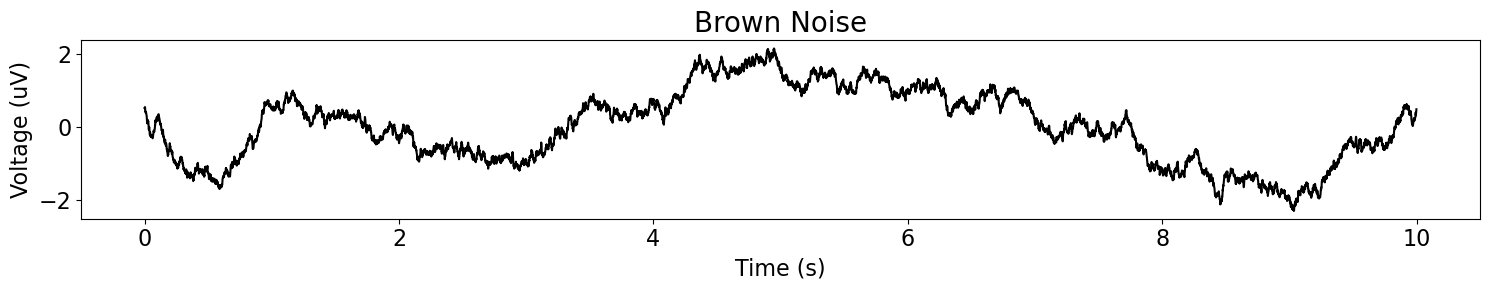

In [6]:
# Plot the simulated data, in the time domain
plot_time_series(times, br_noise, title='Brown Noise')

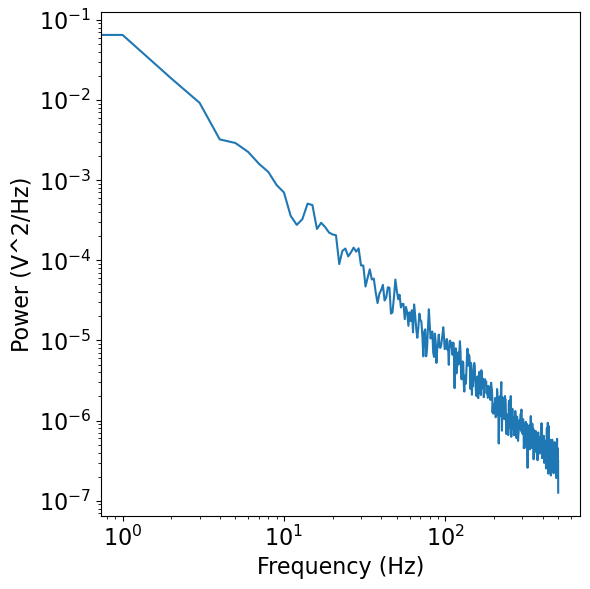

In [8]:
# Plot the simulated data, in the frequency domain
freqs, psd = compute_spectrum(br_noise, fs)
plot_power_spectra(freqs, psd)

Simulate Filtered 1/f Activity
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

The power law simulation function is also integrated with a filter. This can be useful
for filtering out some low frequencies, as is often done with neural signals,
to remove the very slow drifts that we see in the pure 1/f simulations.

To filter a simulated power law signal, simply pass in a filter range, and the filter will
be applied to the simulated data before being returned.

Here we will apply a high-pass filter. We can see that the resulting signal has much less
low-frequency drift than the first one.




In [9]:
# Simulate highpass-filtered brown noise with a 1Hz highpass filter
f_hipass_brown = 1
brown_filt = sim_powerlaw(n_seconds, fs, exponent, f_range=(f_hipass_brown, None))

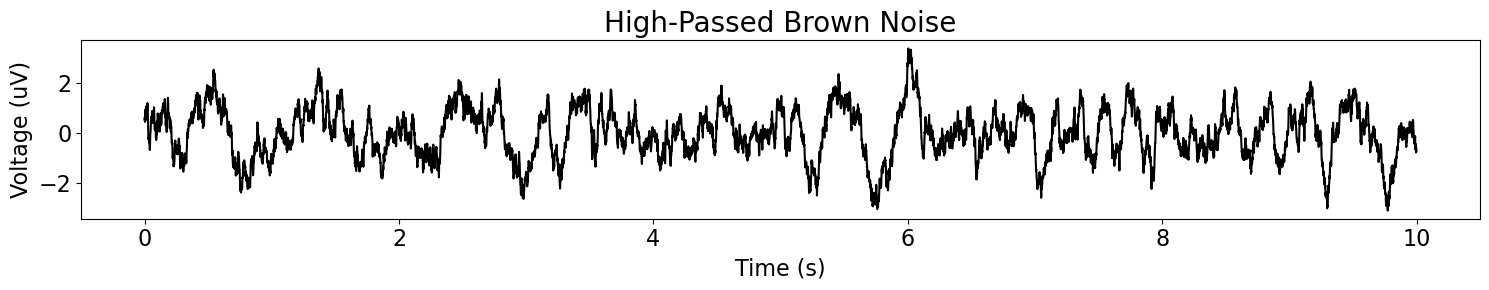

In [10]:
# Plot the simulated data, in the time domain
plot_time_series(times, brown_filt, title='High-Passed Brown Noise')

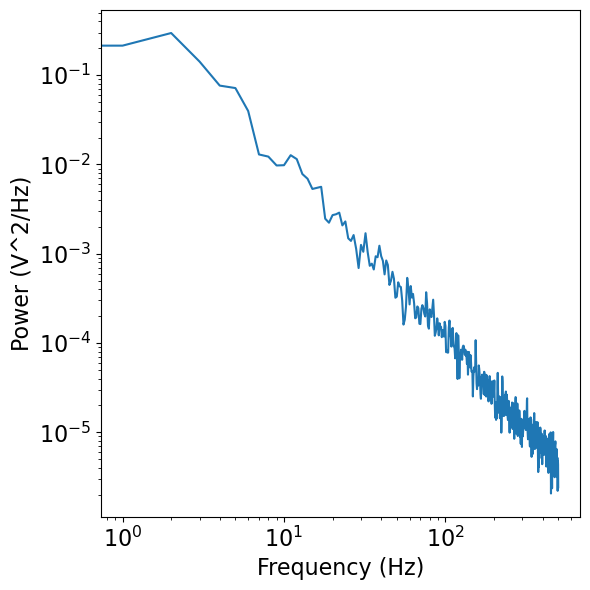

In [11]:
# Plot the simulated data, in the frequency domain
freqs, psd = compute_spectrum(brown_filt, fs)
plot_power_spectra(freqs, psd)

Note: the :func:`~.sim_powerlaw` function can simulate arbitrary
power law exponents, such as pink noise (-1), or any other exponent.




Random Walk Activity
--------------------

We can also simulate an Ornstein-Uhlenbeck process, which is a random walk process with memory.

We can do this with the :func:`~.sim_random_walk` function.




In [12]:
# Simulate aperiodic signals from a random walk process
rw_ap = sim_random_walk(n_seconds, fs)

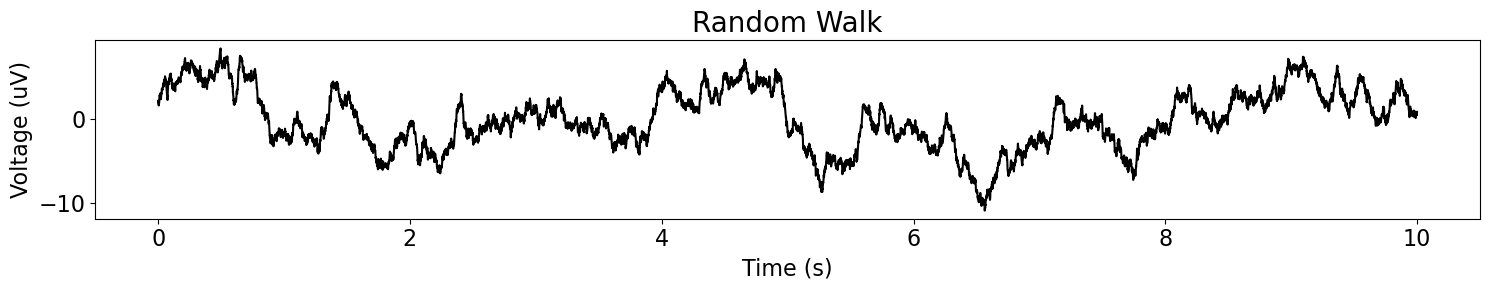

In [13]:
# Plot the simulated data, in the time domain
plot_time_series(times, rw_ap, title='Random Walk')

Simulate Synaptic Activity
--------------------------

Another model for simulating aperiodic, neurally plausible activity, is to simulate
synaptic current activity, as a Lorentzian function.

This is available with the :func:`~.sim_synaptic_current` function.

The synaptic current model is Poisson activity convolved with exponential kernels
that mimic the shape of post-synaptic potentials.

For more details on the usage of such models for simulating neural signals, see
`Gao et al, 2017 <https://doi.org/10.1016/j.neuroimage.2017.06.078>`_.




In [14]:
# Simulate aperiodic activity from the synaptic kernel model
syn_ap = sim_synaptic_current(n_seconds, fs)

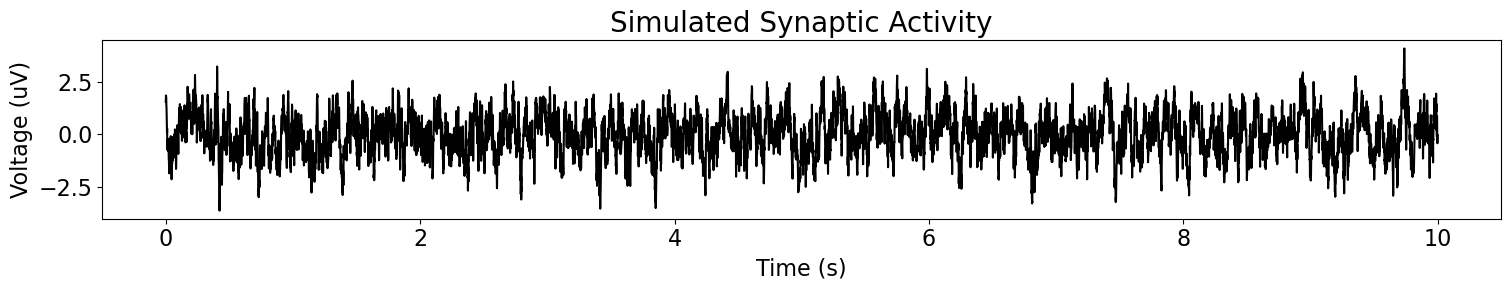

In [15]:
# Plot the simulated data, in the time domain
plot_time_series(times, syn_ap, title='Simulated Synaptic Activity')

Both the random walk, and synaptic model produce 1/f scaling in higher frequencies with a
fixed exponent of -2, as we can see in the power spectra plot below.




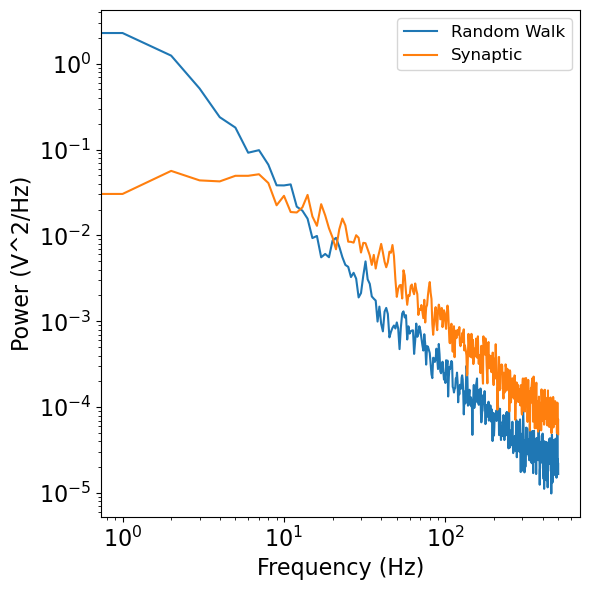

In [16]:
# Plot the simulated data, in the frequency domain
freqs, rw_psd = compute_spectrum(rw_ap, fs)
freqs, syn_psd = compute_spectrum(syn_ap, fs)

plot_power_spectra(freqs, [rw_psd, syn_psd], ['Random Walk', 'Synaptic'])

Simulate Knee Signal
--------------------

To simulate signals with a knee, being able to control both exponents, and the knee,
use the :func:`~.sim_knee` function.




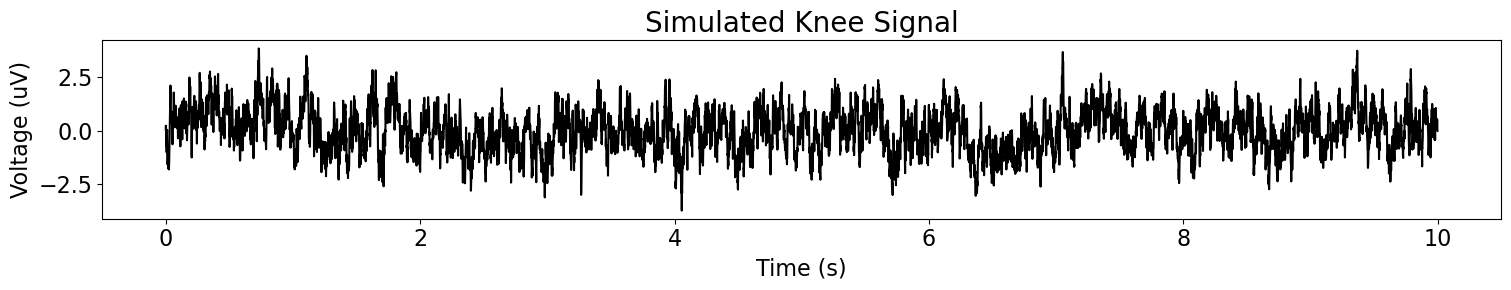

In [17]:
# Simulate a knee signal, with specified exponents & knee
knee_ap1 = sim_knee(n_seconds, fs, exponent1=-0.5, exponent2=-1, knee=100)

# Plot the simulated data, in the time domain
plot_time_series(times, knee_ap1, title='Simulated Knee Signal')

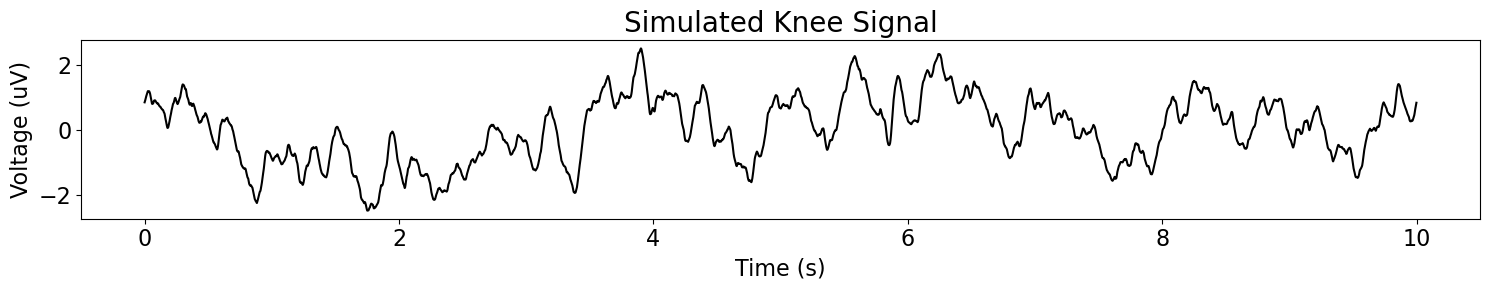

In [18]:
# Simulate another knee signal, with different exponents & knee
knee_ap2 = sim_knee(n_seconds, fs, exponent1=-1, exponent2=-2, knee=100)

# Plot the simulated data, in the time domain
plot_time_series(times, knee_ap2, title='Simulated Knee Signal')

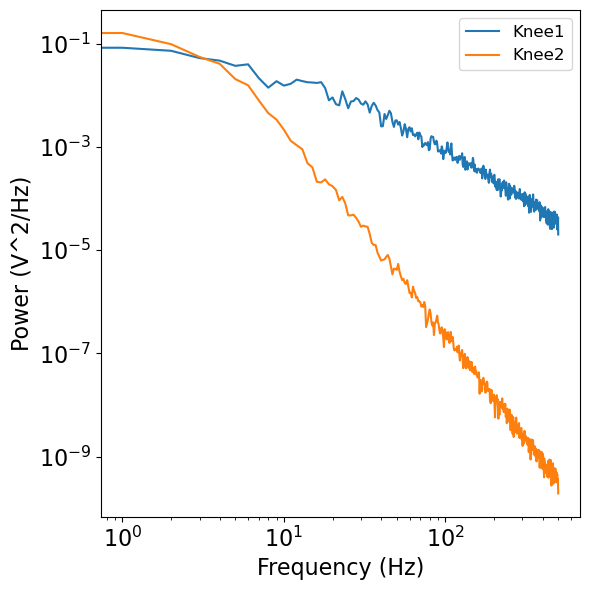

In [19]:
# Compute power spectra of the simulated knee signals
freqs, knee_psd1 = compute_spectrum(knee_ap1, fs)
freqs, knee_psd2 = compute_spectrum(knee_ap2, fs)

# Plot the simulated data, in the frequency domain
plot_power_spectra(freqs, [knee_psd1, knee_psd2], ['Knee1', 'Knee2'])

Simulate Fractional Noise
-------------------------

We also include methods from the field of statistics to simulate other forms
of aperiodic signals.

These include:

- fractional gaussian noise, which can be simulated as a self-similar stochastic process
- fractional brownian motion, which is generalization of brownian motion

Both of these signal types can be used to simulate aperiodic time series, with
powerlaw spectral densities.




Fractional Gaussian Noise
~~~~~~~~~~~~~~~~~~~~~~~~~

To simulate a fractional gaussian noise signal, use the
the :func:`~.sim_frac_gaussian_noise` function.




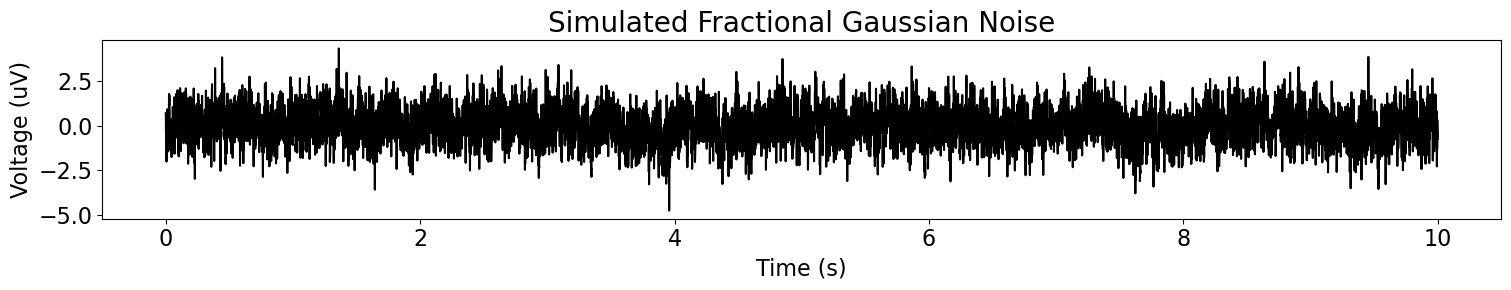

In [20]:
# Simulate fractional gaussian noise signal
gn_ap = sim_frac_gaussian_noise(n_seconds, fs, exponent=-.5)

# Plot the simulated data, in the time domain
plot_time_series(times, gn_ap, title='Simulated Fractional Gaussian Noise')

Fractional Brownian Motion
~~~~~~~~~~~~~~~~~~~~~~~~~~

To simulate a fractional brownian motion signal, use the
:func:`~.sim_frac_brownian_motion` function.




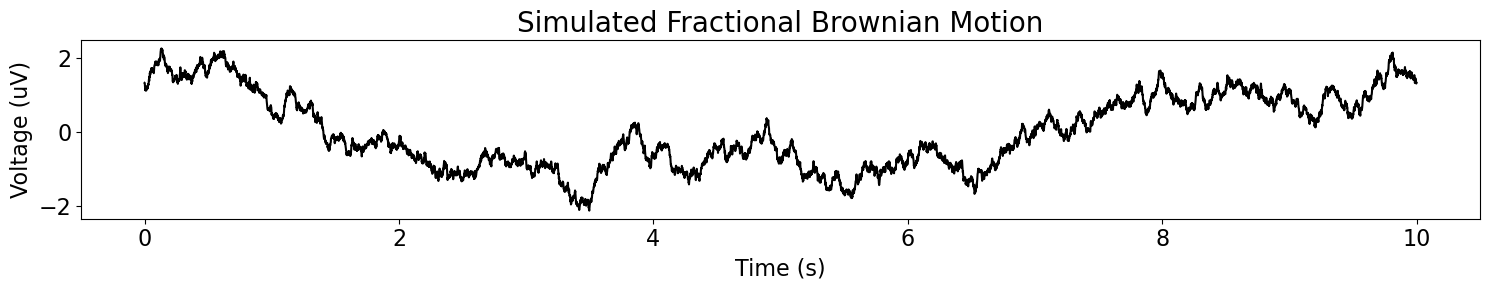

In [21]:
# Simulate fractional brownian motion signal
bm_ap = sim_frac_brownian_motion(n_seconds, fs, exponent=-2)

# Plot the simulated data, in the time domain
plot_time_series(times, bm_ap, title='Simulated Fractional Brownian Motion')